In [85]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
london_weather = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/London_weather_data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
london_weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [3]:
london_weather['date'].sample(n=10).sort_index()

628      19800920
1164     19820310
2719     19860612
5328     19930803
6857     19971010
7249     19981106
8360     20011121
9958     20060407
10585    20071225
13422    20151001
Name: date, dtype: int64

In [4]:
london_weather['datetime'] = pd.to_datetime(london_weather['date'], format = '%Y%m%d')


In [5]:
london_weather = london_weather.set_index(['datetime'])

In [6]:
london_weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [7]:
london_weather = london_weather.drop(columns=['date', 'cloud_cover', 'sunshine', 'global_radiation', 'pressure'])

In [8]:
london_weather.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [9]:
london_weather.isnull().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [10]:
london_weather.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

In [11]:
london_weather = london_weather.asfreq('D')

In [12]:
london_weather.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq='D')

In [13]:
lw_copy = london_weather.copy()

In [15]:
lw_copy = lw_copy.fillna(method='ffill')

In [16]:
lw_copy.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

In [17]:
lw_copy

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
1979-01-01,2.3,-4.1,-7.5,0.4,9.0
1979-01-02,1.6,-2.6,-7.5,0.0,8.0
1979-01-03,1.3,-2.8,-7.2,0.0,4.0
1979-01-04,-0.3,-2.6,-6.5,0.0,2.0
1979-01-05,5.6,-0.8,-1.4,0.0,1.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.0
2020-12-28,3.6,1.1,-1.3,0.2,0.0
2020-12-29,4.1,2.6,1.1,0.0,0.0


In [18]:
lw_copy = lw_copy.loc['1979':'2000']
lw_copy

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
1979-01-01,2.3,-4.1,-7.5,0.4,9.0
1979-01-02,1.6,-2.6,-7.5,0.0,8.0
1979-01-03,1.3,-2.8,-7.2,0.0,4.0
1979-01-04,-0.3,-2.6,-6.5,0.0,2.0
1979-01-05,5.6,-0.8,-1.4,0.0,1.0
...,...,...,...,...,...
2000-12-27,2.9,2.2,1.5,1.8,0.0
2000-12-28,1.2,-0.3,-3.5,0.0,2.0
2000-12-29,3.1,-2.2,-5.5,0.0,1.0


# Q1: What month had the most precipitation between 2000 through 2010?

In [19]:
lw_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8036 entries, 1979-01-01 to 2000-12-31
Freq: D
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       8036 non-null   float64
 1   mean_temp      8036 non-null   float64
 2   min_temp       8036 non-null   float64
 3   precipitation  8036 non-null   float64
 4   snow_depth     8036 non-null   float64
dtypes: float64(5)
memory usage: 376.7 KB


In [103]:
date_range = london_weather.loc['2000':'2010']
date_range

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2010-12-27,8.0,0.2,-4.6,5.0,1.0
2010-12-28,9.5,5.3,2.5,0.4,0.0
2010-12-29,7.7,6.8,4.1,1.4,0.0


In [104]:
precip = date_range['precipitation']
precip.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='datetime', length=4018, freq='D')

In [105]:
precip

datetime
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Freq: D, Name: precipitation, Length: 4018, dtype: float64

In [106]:
precipitation = precip.resample('M').sum()
precipitation

datetime
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [111]:
max_p = precipitation.idxmax()
max_p

Timestamp('2009-11-30 00:00:00', freq='M')

In [112]:
precipitation.loc[max_p]

138.4

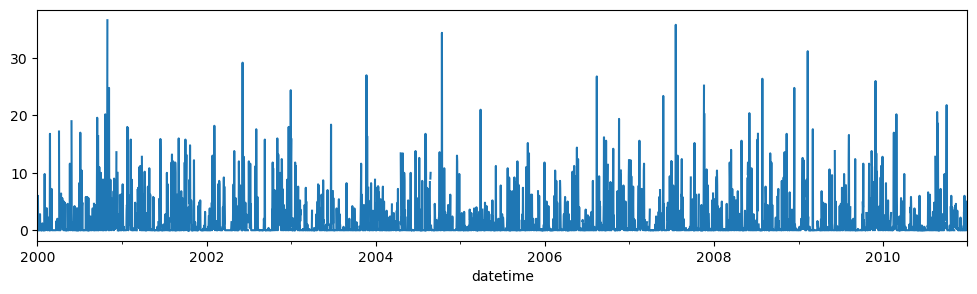

In [129]:
precip.plot(figsize=(12,3));

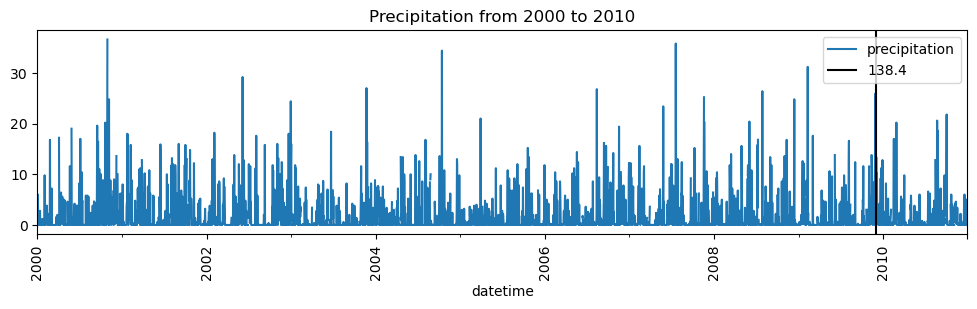

In [113]:
fig, ax = plt.subplots(figsize=(12,3))
precip.plot(ax=ax, title = 'Precipitation from 2000 to 2010')
ax.set_ylabel=('Inches')
ax.axvline(max_p,color='k',label=138.4)
fig.autofmt_xdate(rotation=90,ha='center')
plt.legend();

# Q2: Which year between 2000-2020 had the coolest average temperature?

In [120]:
date_range2 = london_weather.loc['2000':'2020'].copy()
date_range2

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


In [121]:
mt_df = date_range2['mean_temp'].copy()
mt_df

datetime
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Freq: D, Name: mean_temp, Length: 7671, dtype: float64

In [123]:
avg_temp = mt_df.resample('A').mean().copy()
avg_temp

datetime
2000-12-31    11.532070
2001-12-31    11.313006
2002-12-31    12.006286
2003-12-31    12.232764
2004-12-31    11.872046
2005-12-31    11.879883
2006-12-31    12.387941
2007-12-31    12.063717
2008-12-31    11.174855
2009-12-31    11.722254
2010-12-31    10.645773
2011-12-31    12.474566
2012-12-31    11.323907
2013-12-31    11.202017
2014-12-31    12.613881
2015-12-31    12.091884
2016-12-31    11.894602
2017-12-31    12.238506
2018-12-31    12.440922
2019-12-31    12.229070
2020-12-31    12.717117
Freq: A-DEC, Name: mean_temp, dtype: float64

In [126]:
min_temp = avg_temp.idxmin()
min_temp

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [127]:
avg_temp.loc[min_temp]

10.645772594752186

<Axes: xlabel='datetime'>

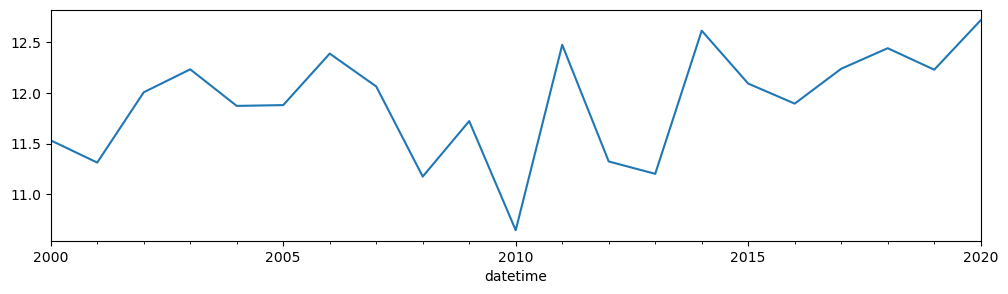

In [134]:
avg_temp.plot(figsize = (12,3))

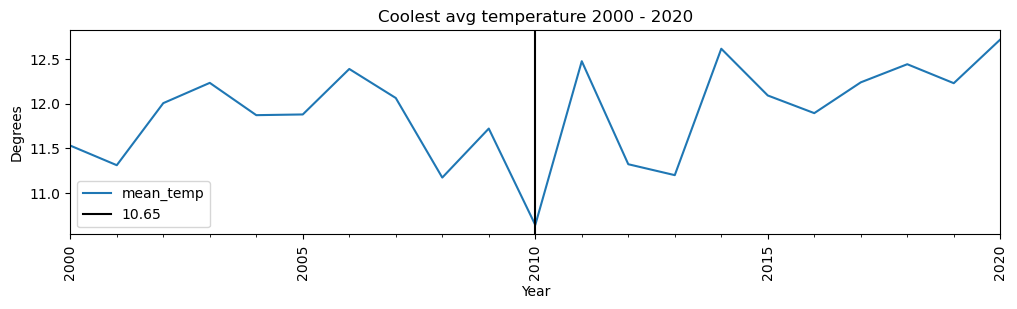

In [140]:
fig, ax = plt.subplots(figsize=(12,3))
avg_temp.plot(ax=ax, title='Coolest avg temperature 2000 - 2020')
ax.set_ylabel('Degrees')
ax.set_xlabel('Year')
ax.axvline(min_temp, color='k', label='10.65')
fig.autofmt_xdate(rotation=90,ha='center')
plt.legend();